In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import necessary libraries
import os
import json
from shapely.geometry import Polygon, MultiPolygon
from PIL import Image, ImageDraw
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as mplPolygon
from shapely.validation import explain_validity

In [ ]:
#Set Train Data Directories
train_image_dir = '/content/drive/My Drive/Segnet IDD Project/Dataset/leftImg8bit/train'
train_annotation_dir = '/content/drive/My Drive/Segnet IDD Project/Dataset/gtFine/train'

#Set Val Data Directories
test_image_dir = '/content/drive/My Drive/Segnet IDD Project/Dataset/leftImg8bit/test2'
test_annotation_dir = '/content/drive/My Drive/Segnet IDD Project/Dataset/gtFine/test2'

#Set Val Data Directories
val_image_dir = '/content/drive/My Drive/Segnet IDD Project/Dataset/leftImg8bit/val'
val_annotation_dir = '/content/drive/My Drive/Segnet IDD Project/Dataset/gtFine/val'

In [ ]:
# Function to load and preprocess data

def load_data(image_dir, annotation_dir):

    X = []  # Images
    Y = []  # Annotations

    # Iterate through JSON files in gtFine folder
    for folder_name in os.listdir(annotation_dir):

        current_annotation_folder = os.path.join(annotation_dir, folder_name)
        current_image_folder = os.path.join(image_dir, folder_name)

        # Iterate through JSON files in each gtFine folder
        for json_file_name in os.listdir(current_annotation_folder):
            json_file_path = os.path.join(current_annotation_folder, json_file_name)

            # Load JSON file
            with open(json_file_path, 'r') as json_file:
                annotation_data = json.load(json_file)

            # Match JSON file to corresponding image
            image_name = json_file_name.replace("_gtFine_polygons.json", "_leftImg8bit.jpg")
            image_path = os.path.join(current_image_folder, image_name)

            # Load image as numpy data
            image = np.array(Image.open(image_path))

            # Resize Image using factor
            resize_factor = 5
            image_height, image_width = image.shape[:2]
            new_resolution = (int(image_width // resize_factor), int(image_height // resize_factor))
            image = cv2.resize(image, new_resolution)

            # Load JSON file
            with open(json_file_path, 'r') as json_file:
                annotation_data = json.load(json_file)

            # Extract polygons from other classes for subtraction
            other_polygons = [obj['polygon'] for obj in annotation_data['objects'] if obj['label'] != 'road']

            # Create a blank binary mask
            mask_size = ([int(image_width // resize_factor), int(image_height // resize_factor)])
            resulting_mask = Image.new('L', mask_size, 0)
            draw = ImageDraw.Draw(resulting_mask)

            # Draw resulting polygons on the mask
            for polygon in other_polygons:
                polygon_coords = [(point[0] / resize_factor, point[1] / resize_factor) for point in polygon]
                draw.polygon(polygon_coords, outline=1, fill=1)

            # Convert the binary mask to a NumPy array
            final_binary_mask = np.array(resulting_mask)
            final_binary_mask = 1 - final_binary_mask

            # Check if images and masks are normalized:

            image_np_min = np.min(image)
            mask_np_min = np.min(final_binary_mask)
            image_np_max = np.max(image)
            mask_np_max = np.max(final_binary_mask)

            if image_np_max > 1:
              image = image / 255

            if mask_np_max > 1:
              final_binary_mask = final_binary_mask / 255

            # Append to lists
            X.append(image)
            Y.append(final_binary_mask)

    # Convert lists to numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    return X, Y


In [ ]:
# Load and preprocess training data
train_images, train_binary_masks = load_data(train_image_dir, train_annotation_dir)

In [ ]:
np.save('/content/drive/My Drive/Segnet IDD Project/Version 5/Prepared Data/train_images.npy', train_images)
np.save('/content/drive/My Drive/Segnet IDD Project/Version 5/Prepared Data/train_binary_masks.npy', train_binary_masks)
print("Training data saved")

Training data saved


In [ ]:
# Load and preprocess val data
val_images, val_binary_masks = load_data(val_image_dir, val_annotation_dir)

In [ ]:
np.save('/content/drive/My Drive/Segnet IDD Project/Version 5/Prepared Data/val_images.npy', val_images)
np.save('/content/drive/My Drive/Segnet IDD Project/Version 5/Prepared Data/val_binary_masks.npy', val_binary_masks)
print("Validation data saved")

Validation data saved


In [ ]:
test_images, test_binary_masks = load_data(test_image_dir, test_annotation_dir)
np.save('/content/drive/My Drive/Segnet IDD Project/Version 5/Prepared Data/test_images.npy', test_images)
np.save('/content/drive/My Drive/Segnet IDD Project/Version 5/Prepared Data/test_binary_masks.npy', test_binary_masks)
print("Testing data saved")

Testing data saved


In [ ]:
train_images.shape

(1732, 216, 384, 3)

In [ ]:
train_binary_masks.shape

(1732, 216, 384)

In [ ]:
val_images.shape

(49, 216, 384, 3)

In [ ]:
val_binary_masks.shape

(49, 216, 384)

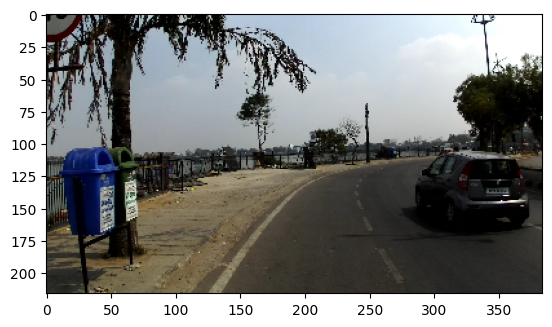

In [ ]:
plt.imshow(train_images[1731])

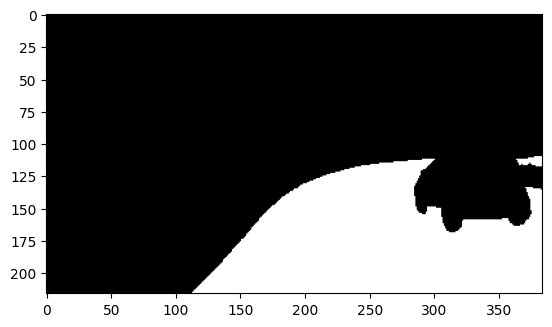

In [ ]:
plt.imshow(train_binary_masks[1731], cmap='gray')

In [ ]:
np.max(train_images)

1.0

In [ ]:
print(test_images.shape)
print(test_binary_masks.shape)
print(np.max(test_images))
print(np.max(test_binary_masks))

(28, 216, 384, 3)
(28, 216, 384)
1.0
1


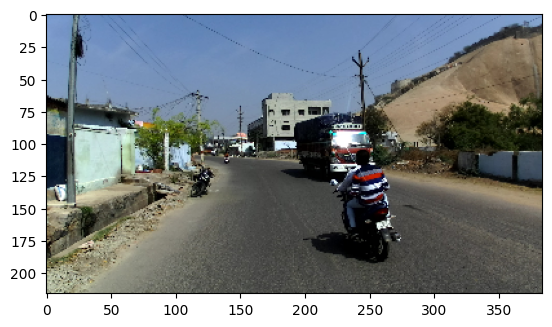

In [ ]:
plt.imshow(test_images[15])

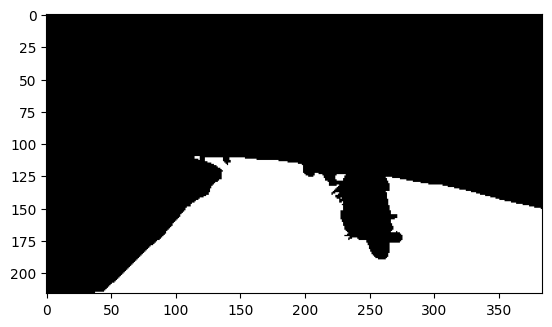

In [ ]:
plt.imshow(test_binary_masks[15], cmap='gray')